# Biomed Data Analyst Training Program - Chapter 1 
 Modern Statistics: A Computer Based Approach with Python<br>
by Ron Kenett, Shelemyahu Zacks, Peter Gedeck

Publisher: Springer International Publishing; 1st edition (September 15, 2022) <br>
ISBN-13: 978-3031075650

(c) 2022 Ron Kenett, Shelemyahu Zacks, Peter Gedeck

The code needs to be executed in sequence.

Python packages and Python itself change over time. This can cause warnings or errors. We
"Warnings" are for information only and can usually be ignored. 
"Errors" will stop execution and need to be fixed in order to get results. 

If you come across an issue with the code, please follow these steps

- Check the repository (https://gedeck.github.io/mistat-code-solutions/) to see if the code has been upgraded. This might solve the problem.
- Check the errata at (https://gedeck.github.io/mistat-code-solutions/ModernStatistics/) and the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues to see if the issue is known and a solution available.
- Report the problem using the issue tracker at https://github.com/gedeck/mistat-code-solutions/issues
- Paste the error message into Google and see if someone else already found a solution

In [1]:
import os
os.environ['OUTDATED_IGNORE'] = '1'
import warnings
from outdated import OutdatedPackageWarning
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=OutdatedPackageWarning)

Use a command like the following to install missing Python packages from Jupyter notebooks. 

In [2]:
pip install mistat

Note: you may need to restart the kernel to use updated packages.


In [3]:
import mistat

# Analyzing Variability: Descriptive Statistics

To demonstrate descriptive statistics, we use the dataset `Yield of tomatoes.CSV`. It contains the yield of tomatoes for 11 experiments under different treatment (A or B). 

First load the data:

In [4]:
import pandas as pd

data = pd.read_csv('Yield of tomatoes.CSV')
data.head()

,yield,treat
0,29.9,A
1,11.4,A
2,26.6,B
3,23.7,B
4,25.3,A


Visualize the data:

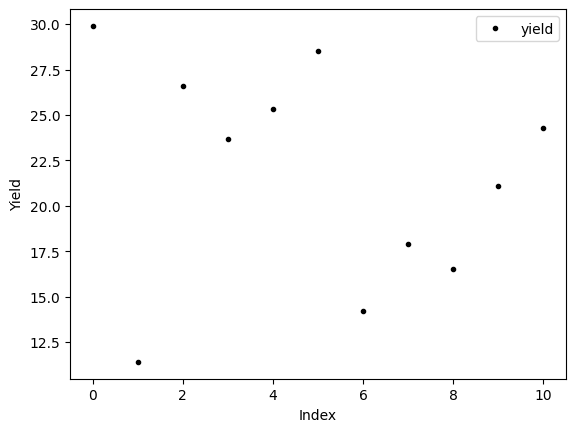

In [5]:
import matplotlib.pyplot as plt

# create a scatterplot
ax = data.plot(y='yield', style='.', color='black')
ax.set_xlabel('Index') # set the x axis title
ax.set_ylabel('Yield') # set the y axis title
plt.show()

Sort data by treatment and repeat visualization

21.799999999999997


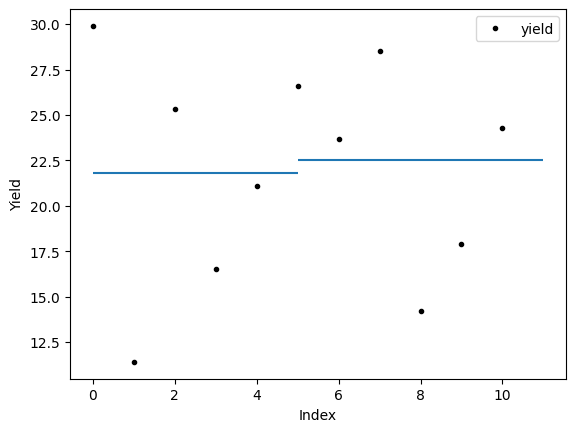

In [6]:
data = data.sort_values(by=['treat'],ignore_index=True)
count_A = sum(data['treat'] == 'A')
print(data.loc[:count_A, 'yield'].mean())

ax = data.plot(y='yield', style='.', color='black')
ax.set_xlabel('Index')
ax.set_ylabel('Yield')
ax.hlines(y=data.loc[:count_A, 'yield'].mean(), xmin=0, xmax=count_A)
ax.hlines(y=data.loc[count_A:, 'yield'].mean(), xmin=count_A, xmax=len(data))
plt.show()

## The Population and the Sample

## Descriptive Analysis of Sample Values

### Frequency Distributions of Discrete Random Variables

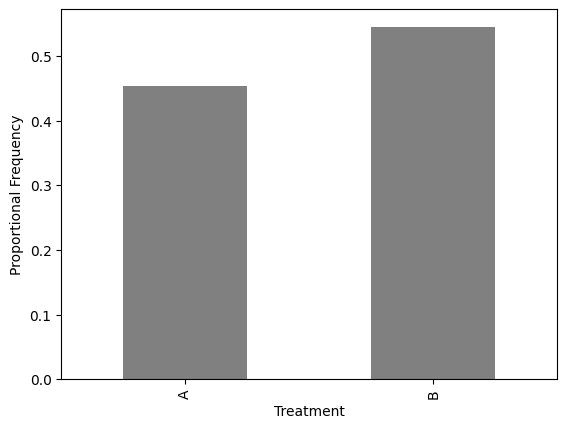

In [7]:
# use value_counts with normalize to get relative frequencies
X = pd.DataFrame(data['treat'].value_counts(normalize=True))
X = X.sort_index()  # sort by treatment

ax = X['proportion'].plot.bar(color='grey', legend=False)
ax.set_xlabel('Treatment')
ax.set_ylabel('Proportional Frequency')
plt.show()

### Frequency Distributions of Continuous Random Variables

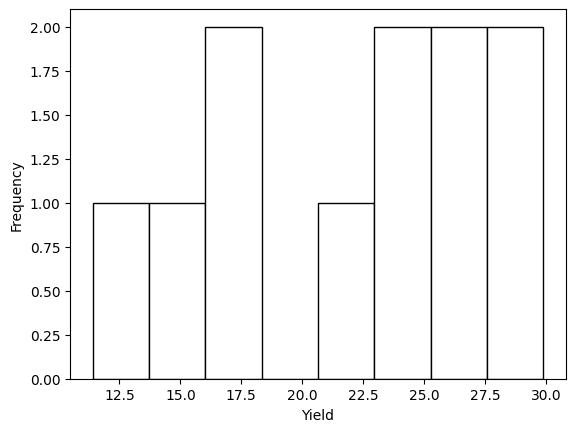

In [8]:
# change bins to 
X = data['yield']
ax = X.plot.hist(bins=8, color='white', edgecolor='black', legend=False)
ax.set_xlabel('Yield')
plt.show()

Cumulative relative frequency distribution of yield

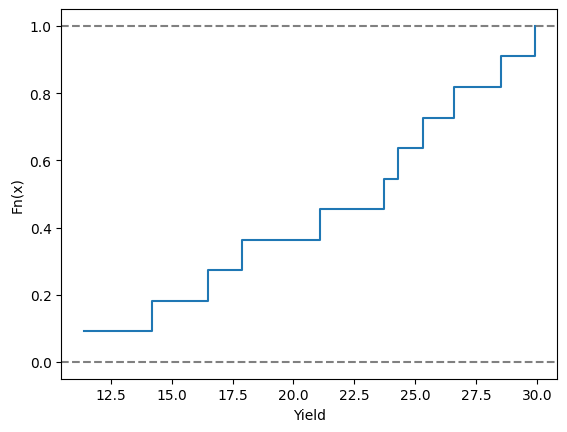

In [9]:
ecdf = pd.DataFrame({'Yield': X.sort_values(),
                     'Fn(x)': range(1, len(X) + 1)})
ecdf['Fn(x)'] = ecdf['Fn(x)'] / len(X)
ax = ecdf.plot(x='Yield', y='Fn(x)', drawstyle='steps-post', legend=False)
ax.axhline(y=0, color='grey', linestyle='--')
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Fn(x)')
plt.show()

Compare the cumulative relative frequency distribution of yield by treatment

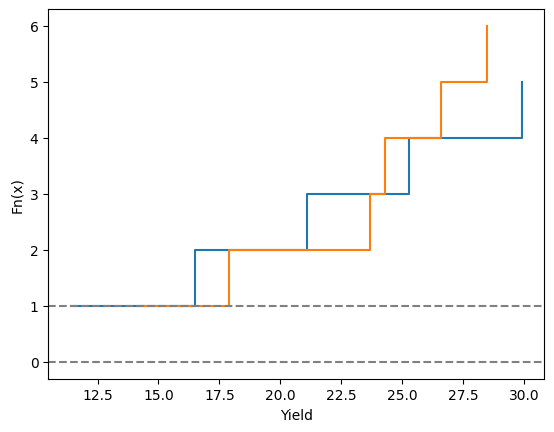

In [10]:
yield_A = data[data['treat'] == 'A']['yield']
yield_B = data[data['treat'] == 'B']['yield']

ecdf_A = pd.DataFrame({'Yield': yield_A.sort_values(), 'Fn(x)': range(1, len(yield_A) + 1)})
ecdf_B = pd.DataFrame({'Yield': yield_B.sort_values(), 'Fn(x)': range(1, len(yield_B) + 1)})

ax = ecdf_A.plot(x='Yield', y='Fn(x)', drawstyle='steps-post', legend=False)
ecdf_B.plot(x='Yield', y='Fn(x)', drawstyle='steps-post', legend=False, ax=ax)
ax.axhline(y=0, color='grey', linestyle='--')
ax.axhline(y=1, color='grey', linestyle='--')
ax.set_ylabel('Fn(x)')
plt.show()

# Statistics for the ordered sample

In [11]:
# quantiles
data['yield'].quantile(q=[0, 0.25, 0.5, 0.75, 1.0])

0.00    11.40
0.25    17.20
0.50    23.70
0.75    25.95
1.00    29.90
Name: yield, dtype: float64

In [12]:
data['yield'].mean()

21.763636363636365

In [13]:
data['yield'].describe()

count    11.000000
mean     21.763636
std       6.044381
min      11.400000
25%      17.200000
50%      23.700000
75%      25.950000
max      29.900000
Name: yield, dtype: float64

### Statistics of Location and Dispersion

In [14]:
X = data['yield']
print(f'Skewness {X.skew():.4f}')     # Computes the skewness
print(f'Kurtosis {X.kurtosis():.4f}') # Computes the kurtosis

from scipy.stats import skew, kurtosis
print(f'Skewness {skew(X):.4f}')     # Computes the skewness
print(f'Kurtosis {kurtosis(X):.4f}') # Computes the kurtosis

Skewness -0.4009
Kurtosis -1.0076
Skewness -0.3440
Kurtosis -1.1046


## Additional Techniques of Exploratory Data Analysis

### Density Plots

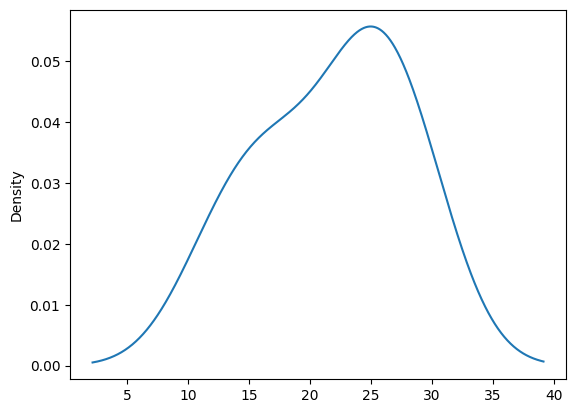

In [15]:
data['yield'].plot.density()
plt.show()

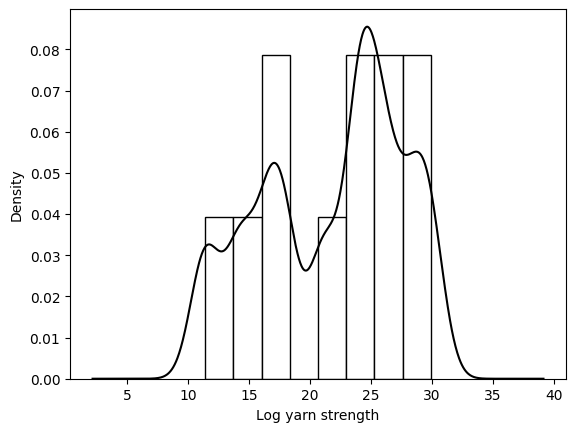

In [16]:
# compare to histogram
X = data['yield']
ax = X.plot.hist(bins=8, color='white', edgecolor='black', legend=False, density=True)
X.plot.density(bw_method=0.2, ax=ax, color='black')
ax.set_xlabel('Log yarn strength')
plt.show()

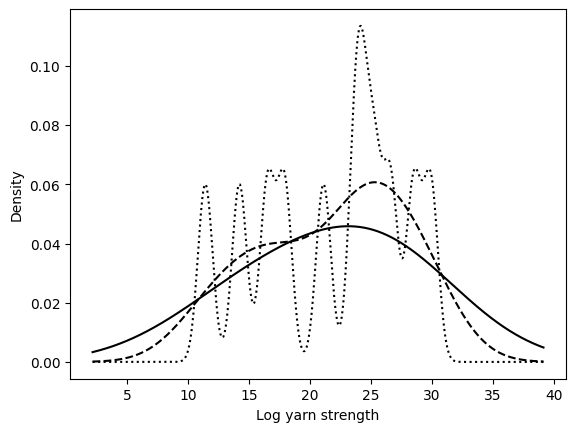

In [17]:
# influence of bandwidth on density plots

X = data['yield']
ax = X.plot.density(bw_method=0.1, ls=':', color='black')
X.plot.density(bw_method=0.5, ax=ax, ls='--', color='black')
X.plot.density(bw_method=1, ax=ax, color='black')
ax.set_xlabel('Log yarn strength')
plt.show()

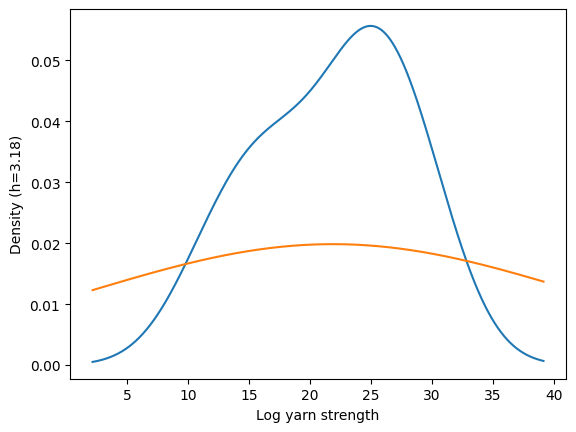

In [18]:
from KDEpy.bw_selection import improved_sheather_jones
h = improved_sheather_jones(X.values.reshape(-1, 1))
ax = X.plot.density()
X.plot.density(bw_method=h, ax=ax)
ax.set_xlabel('Log yarn strength')
ax.set_ylabel(f'Density (h={h:.2f})')
plt.show()

### Box and Whiskers Plots

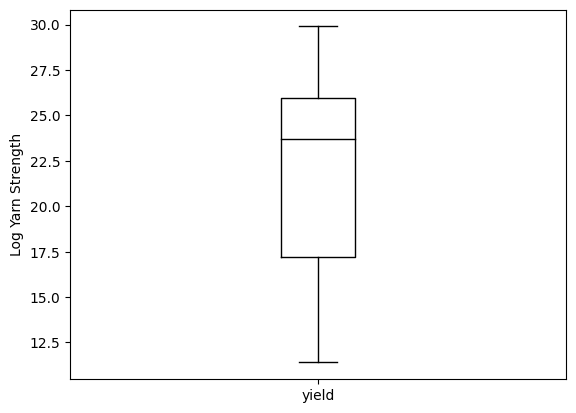

In [19]:
X = data['yield']
ax = X.plot.box(color='black')
ax.set_ylabel('Log Yarn Strength')
plt.show()

In [20]:
X = data['yield']
yarn_q1, yarn_q3 = X.quantile(q=[0.25, 0.75])
lw = f'{yarn_q1 - 1.5*(yarn_q3 - yarn_q1):.4f}'
uw = f'{yarn_q3 + 1.5*(yarn_q3 - yarn_q1):.4f}'
yarn_iqr = f'{yarn_q3 - yarn_q1:.4f}'
yarn_q1, yarn_me, yarn_q3 = [f'{q:.4f}' for q in X.quantile(q=[0.25, 0.5, 0.75])]
yarn_min = f'{X.min():.4f}'
yarn_max = f'{X.max():.4f}'
yarn_mean = f'{X.mean():.4f}'
yarn_std = f'{X.std():.4f}'

### Quantile Plots

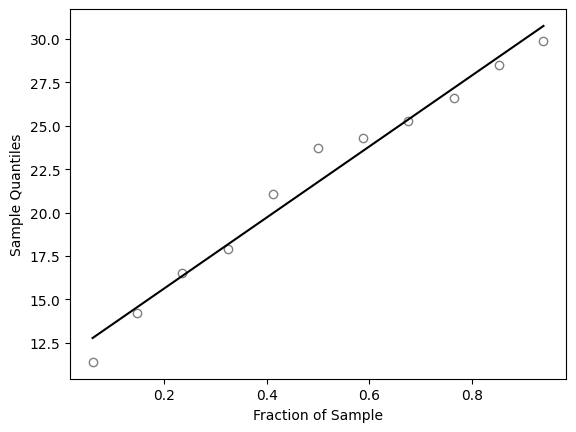

In [21]:
from scipy.stats import probplot, uniform

X = data['yield']
ax = plt.subplot()
res = probplot(X, dist=uniform, plot=ax)
ax.set_xlabel('Fraction of Sample')
ax.set_ylabel('Sample Quantiles')
ax.set_title('')
ax.get_lines()[0].set_color('grey')
ax.get_lines()[0].set_markerfacecolor('none')
ax.get_lines()[1].set_color('black')
plt.show()

### Stem-and-Leaf Diagrams

In [22]:
X = data['yield']

mistat.stemLeafDiagram(X, 2, leafUnit=1)

       2      1   14
       4      1   67
     (3)      2   134
       4      2   5689


### Robust Statistics for Location and Dispersion

In [23]:
from scipy.stats import trim_mean

Oelect = data['yield']

def mySummary(x, trim=0):
  """ Returns summary information for list x

  The optional argument trim can be used to calculate a trimmed mean
  """
  x = pd.Series(x)  # convert to pandas series

  quantiles = list(x.quantile(q=[0, 0.25, 0.5, 0.75, 1.0]))
  trimmed_mean = trim_mean(x, trim)

  # return the summary information as pandas Series
  return pd.Series({
    'Min': quantiles[0],
    'Q1': quantiles[1],
    'Median': quantiles[2],
    'Mean': trimmed_mean,
    'Q3': quantiles[3],
    'Max': quantiles[4],
    'SD': x.std(),
    'IQR': quantiles[3] - quantiles[1],
  })

In [24]:
# compare untrimmed and trimmed 
print(pd.DataFrame({
  'untrimmed': mySummary(Oelect),
  'trimmed': mySummary(Oelect, trim=0.1),
}))

        untrimmed    trimmed
Min     11.400000  11.400000
Q1      17.200000  17.200000
Median  23.700000  23.700000
Mean    21.763636  22.011111
Q3      25.950000  25.950000
Max     29.900000  29.900000
SD       6.044381   6.044381
IQR      8.750000   8.750000
